# Simulación de acciones#

## Rendimientos en empresas tecnológicas (NASDAQ)##

### Objetivo general##

Nuestro proyecto consiste en realizar simulaciones sobre 4 empresas tecnologicas que cotizan en la bolsa, propiamente del grupo (NASDAQ), con el fin de observar cuales son las probabilidades de maximización de ganancias mediante simulación Montecarlo.
Nuestras empresas son: Microsoft, Apple, Intel Corporation, Nvidia

Mediante simulación Montecarlo y graficando las simulaciones realizaremos nuestras predicciones con las cuales prodemos visualizar, analizar y concluir las probabilidades que hay de que suba un 10% la acción de cada empresa, todo esto con el fin de saber si debemos comprar o vender, realizar una buena inversión y maximizar las ganancias y recursos.

### Objetivos especificos###


- Realizar la Simulación de las acciones de la empresa Microsoft.
- Realizar la Simulación de las acciones de la empresa Apple.
- Realizar la Simulación de las acciones de la empresa Intel Corporation.
- Realizar la Simulación de las acciones de la empresa Nvidia.
- Realizar una correcta predicción de que suban las acciones el 10% de su valor.

### Importar librerias correspondientes###

In [2]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd

Se importaron las librerías pandas_datareader.data para importar los datos de las acciones de las empresas que se van a estar simulando, librería matplotlib.pyplot para graficar, librería random, numpy y pandas para las tablas donde se mostrarán los datos.

### Importar los datos de yahoo finance###


In [4]:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

Se define función get_closes para importar los ajustes de cierre de las 4 empresas de tecnología (NASDAQ), que elegimos que son Microsoft, Apple, Intel Corporation y Nvidia.

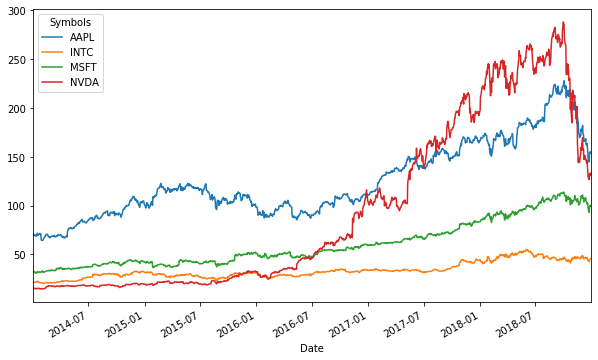

In [5]:
names = ['MSFT','AAPL','INTC','NVDA']
start, end = '2014-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

Gráfica que muestra las fluctuaciones en los precios de las empresas desde el primero de enero del 2014 hasta el 31 de diciembre del 2018.

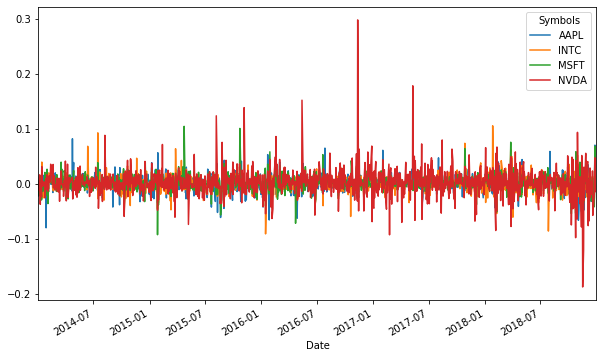

In [6]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

Gráfica de los rendimientos de cada empresa.

### Rendimientos###

Para calcular los rendimientos que habrá en un futuro se hace por medio de la fórmula de densidad de la distribución normal que es:

$$\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Donde $\sigma$ es la desviación estándar, $\mu$ es la media muestral y $x$ es nuestra variable. Se usarán 4 $\sigma$ y 4 $\mu$ diferentes, cada una con su respectiva compañía.

#### Media de cada empresa####

In [9]:
mu_M, mu_S,mu_N,mu_E = ret.mean()["MSFT"], ret.mean()["AAPL"], ret.mean()["INTC"], ret.mean()["NVDA"]
mu_M, mu_S,mu_N,mu_E

(0.001002030225885538,
 0.000735737372517043,
 0.00071288822138129,
 0.002052574707841906)

#### Sigma de cada empresa####

In [18]:
s_M, s_A,s_I,s_N = ret.std()["MSFT"], ret.std()["AAPL"], ret.std()["INTC"], ret.std()["NVDA"]
s_M, s_A,s_I,s_N

(0.014595261779746323,
 0.01507110097599108,
 0.01552837610169047,
 0.025378674676238135)

#### Ret_sim####

In [11]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

Se define la función ret_sim que nos sirve para simular escenarios de rendimientos obtenidos de las empresas.

In [19]:
simret_M = ret_sim(mu_M, s_M, 365, 1000, '2019-01-01')
simret_A = ret_sim(mu_S, s_A, 365, 1000, '2019-01-01')
simret_I = ret_sim(mu_N, s_I, 365, 1000, '2019-01-01')
simret_N = ret_sim(mu_E, s_N, 365, 1000, '2019-01-01')

Se obtienen 1000 escenarios de simulaciones de las empresas en el
plazo de 1 año.

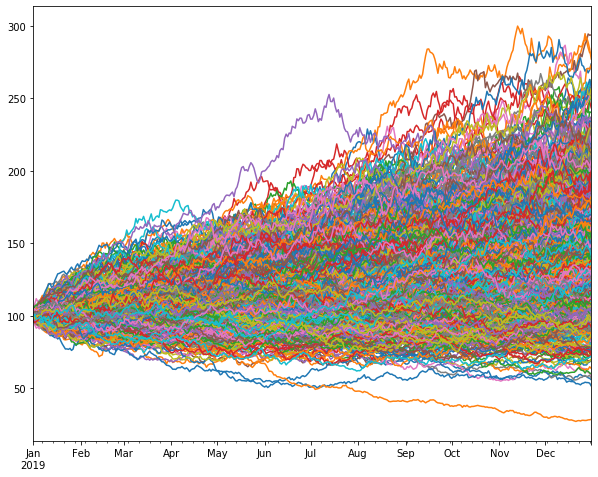

In [20]:
simcloses_M = closes.iloc[-1].MSFT*((1+simret_M).cumprod())
simcloses_A = closes.iloc[-1].AAPL*((1+simret_A).cumprod())
simcloses_I = closes.iloc[-1].INTC*((1+simret_I).cumprod())
simcloses_N = closes.iloc[-1].NVDA*((1+simret_N).cumprod())
simcloses_M.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Microsoft

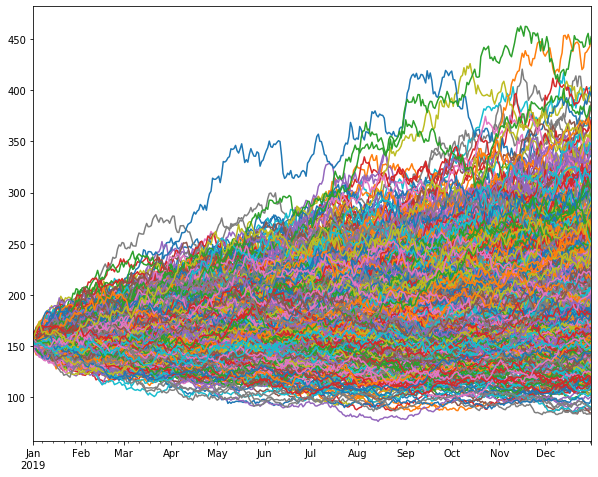

In [21]:
simcloses_A.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Apple

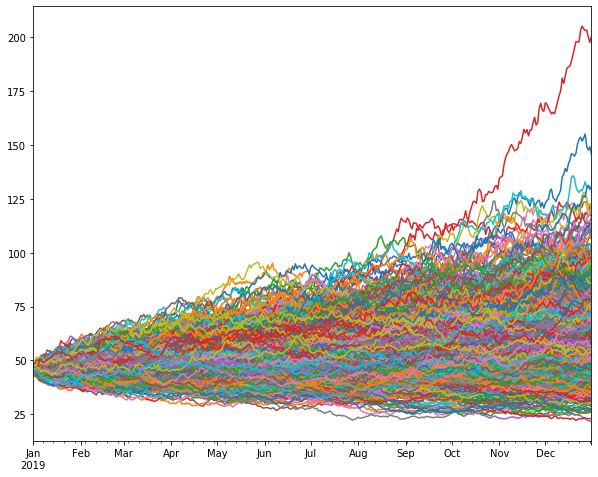

In [22]:
simcloses_I.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Intel Corporation

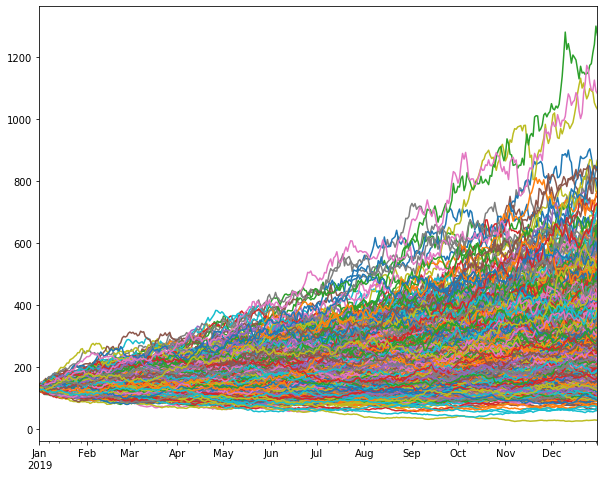

In [24]:
simcloses_N.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Nvdia